In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

#import a module for pandas to show all the columns in a dataset
pd.set_option('display.max_columns', 100)


In [3]:
df = pd.read_csv('coaster_db.csv')

## 1. Data Exploration 

In [9]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
df.shape

(1087, 56)

In [14]:
# list out all the columns 
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [17]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [16]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## 2. Data preperation 

### Drop the irrelevant columns 

In [19]:
 
df = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 
    'Status', 
    #'Opening date',
       #'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
      # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
      # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
      # 'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
    'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [20]:
df.shape

(1087, 13)

In [21]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

### changing data type into datetime

In [23]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

### rename column names

In [29]:
df = df.rename(columns={'coaster_name':'Coaster_Name',
                  'year_introduced':'Year_Introduced',
                  'latitude':'Latitude',
                  'longitude':'Longitude',
                  'opening_date_clean':'Opening_Date',
                  'speed_mph':'Speed_mph',
                  'height_ft':'Height_ft',
                    'Inversions_clean':'Inversions',
                  'Gforce_clean':'Gforce'})

In [30]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


### check for any missing/duplicated values

In [31]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [34]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [35]:
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [39]:
#Checking for example duplicates
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [45]:
#Drop duplicated columns under 3 certian column names
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index(drop=True).copy()

In [46]:
df.shape

(990, 13)

### 3. Feature Understanding

In [48]:
df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

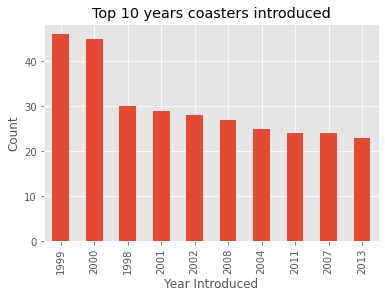

In [59]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title = 'Top 10 years coasters introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count');

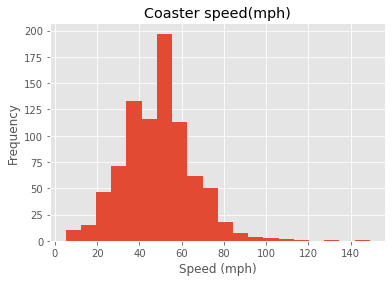

In [68]:
ax = df['Speed_mph'].plot(kind = 'hist', 
                     bins = 20, 
                     title = 'Coaster speed(mph)')
ax.set_xlabel('Speed (mph)');

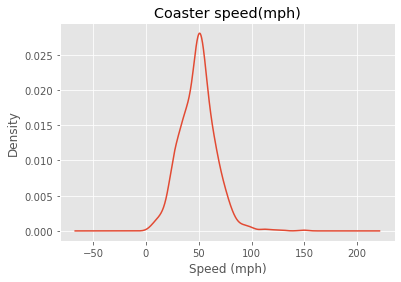

In [67]:
ax = df['Speed_mph'].plot(kind = 'kde',
                     title = 'Coaster speed(mph)')
ax.set_xlabel('Speed (mph)');


## 4. Feature Relationship

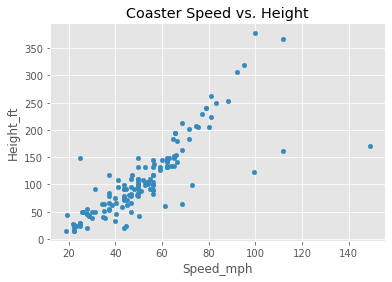

In [74]:
df.plot(kind = 'scatter',
        x = 'Speed_mph',
       y = 'Height_ft',
       title = 'Coaster Speed vs. Height');

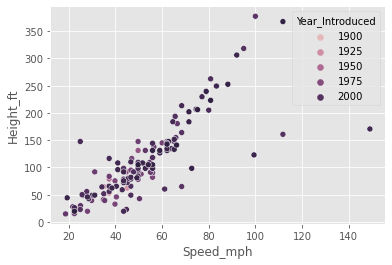

In [81]:
sns.scatterplot(x = 'Speed_mph',
                y = 'Height_ft',
                hue = 'Year_Introduced',
                data = df);

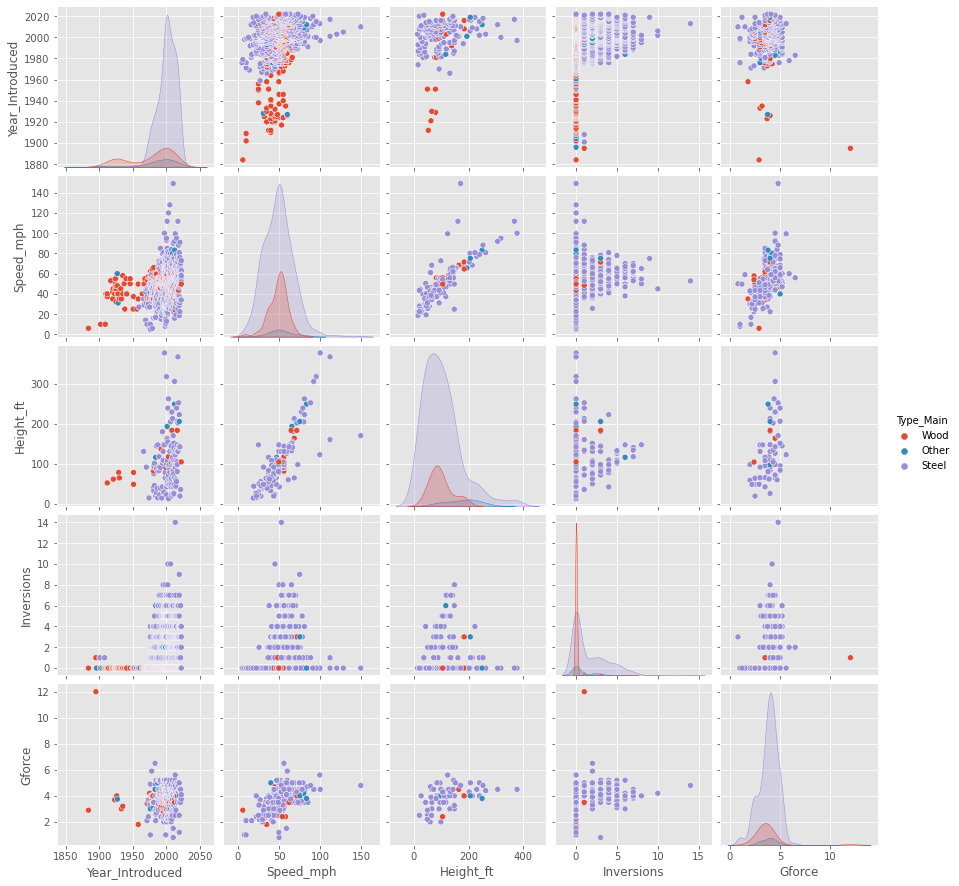

In [85]:

sns.pairplot(df, vars=['Year_Introduced', 'Speed_mph',
                      'Height_ft','Inversions','Gforce'],
            hue= 'Type_Main');

In [88]:
#Correlations
df_corr = df[['Year_Introduced', 'Speed_mph',
                      'Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<AxesSubplot:>

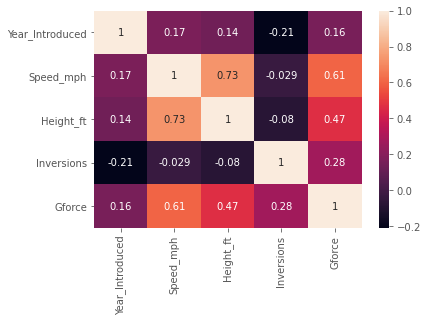

In [90]:
#Heatmap
sns.heatmap(df_corr, annot=True)

### Questions to ask about the data

#### What are the locations with the fastest roller-coasters? with the minumum of 10 coasters within that location

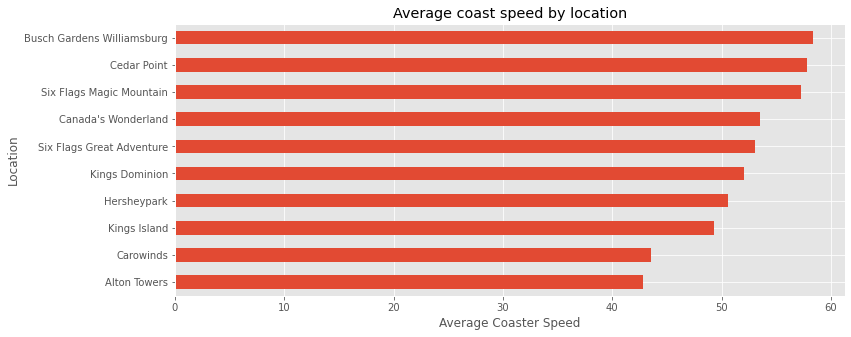

In [100]:
ax = df.query('Location != "Other"')\
    .groupby('Location')['Speed_mph']\
    .agg(['mean','count'])\
    .query('count >= 10')\
    .sort_values('mean')['mean']\
    .plot(kind='barh', figsize=(12 , 5), title= 'Average coast speed by location')
ax.set_xlabel('Average Coaster Speed');